In [3]:
# import data handling libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [ ]:
# Importing dataset

df = pd.read_csv('/content/Maternal Health Risk Data Set - Maternal Health Risk Data Set.csv')

In [ ]:
# showing shape of data

rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 1014
Number Of Columns : 7


In [ ]:
# prompt: give me the risk numbers

risk_counts = df['RiskLevel'].value_counts()
print(risk_counts)


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [ ]:
# Showing Sample of Data

df.sample(1).iloc[0]

,231
Age,25
SystolicBP,140
DiastolicBP,100
BS,7.2
BodyTemp,98.0
HeartRate,80
RiskLevel,high risk


In [ ]:
# Getting Information About Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
# Getting Some Stats of Dataset

df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
# Showing Number of unique values of data

df.nunique()

,0
Age,50
SystolicBP,19
DiastolicBP,16
BS,29
BodyTemp,8
HeartRate,16
RiskLevel,3


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Identify columns with non-numeric data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Handle non-numeric columns (example: fill with a placeholder)
for col in non_numeric_cols:
    df[col].fillna("Unknown", inplace=True)  # Replace "Unknown" with a suitable placeholder

# Fill missing values in numeric columns with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Non-numeric columns: Index(['RiskLevel'], dtype='object')


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
# Showing top 5 rows of data

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

# Correct the column name if there's a typo or case mismatch
# For example, if the actual column name is 'High Risk':
df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

# If the column is still not found, check your data loading process

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [ ]:
# Display basic information about the dataset
print(df.info())

# Show the shape of the dataset
print("\nDataset shape:", df.shape)

# Display descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# Show the number of unique values in each column
print("\nNumber of unique values in each column:\n", df.nunique())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Display a sample of the data
print("\nSample of the data:\n", df.sample(5))

# Display the distribution of the target variable
print("\nDistribution of the target variable:\n", df['RiskLevel'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB
None

Dataset shape: (1014, 7)

Descriptive statistics:
                Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_encoder = LabelEncoder()
df['RiskLevel'] = label_encoder.fit_transform(df['RiskLevel'])

# Separate features and target variable
x = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

# Normalize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
# Showing Correlation

df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


<Axes: >

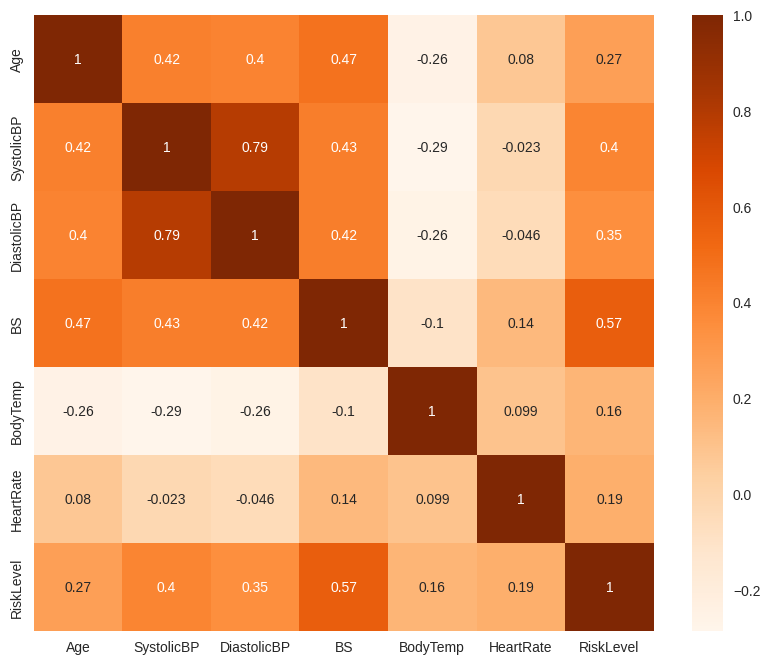

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Oranges')

In [ ]:
# prompt: describe the heatmap

# The heatmap shows the correlation between different features in the dataset.
# Darker shades indicate a stronger positive or negative correlation.
# Lighter shades indicate a weaker or no correlation.
# For example, in this heatmap, we can see that 'SystolicBP' and 'DiastolicBP' have a strong positive correlation.
# This means that as 'SystolicBP' increases, 'DiastolicBP' tends to increase as well.


In [ ]:
#checking null value

df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
#Checking for Duplicated Rows

print("The Number of duplicated values : ")
df.duplicated().sum()

The Number of duplicated values : 


562

In [ ]:
# prompt: Perform feature selection or engineering to identify and use only relevant features.

from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Apply SelectKBest for feature selection
selector = SelectKBest(chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Use X_new (selected features) for further modeling


Selected Features: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate'], dtype='object')


[0.14736446 0.1685434  0.12941364 0.38870072 0.0684003  0.09757748]


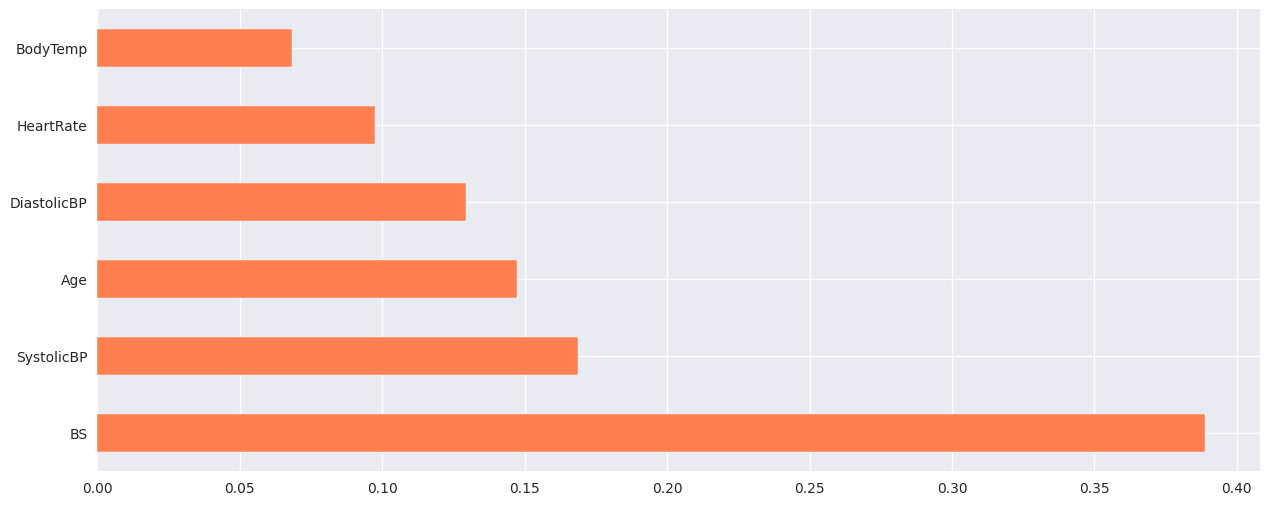

In [ ]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh', color='coral')
plt.show()

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [ ]:
#checking null value

df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


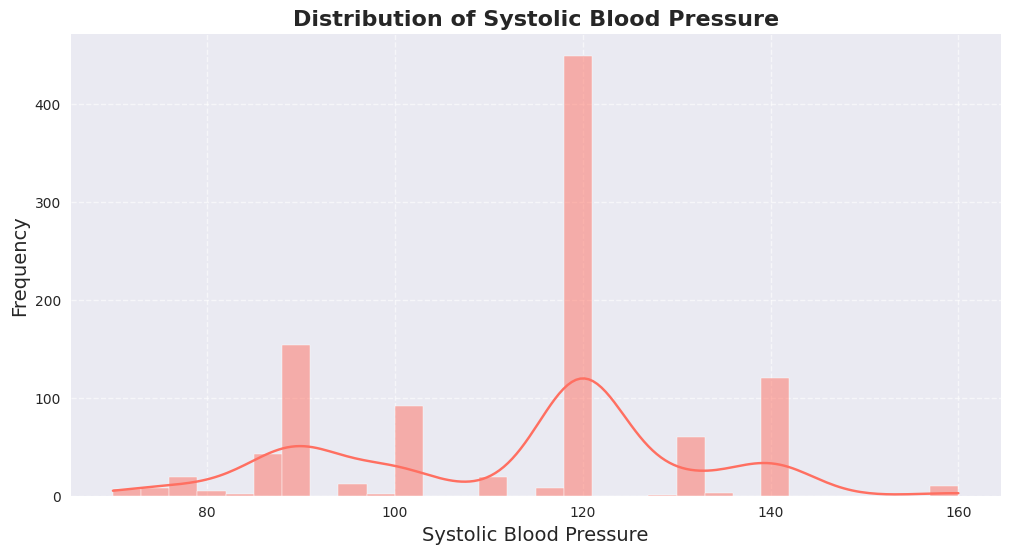

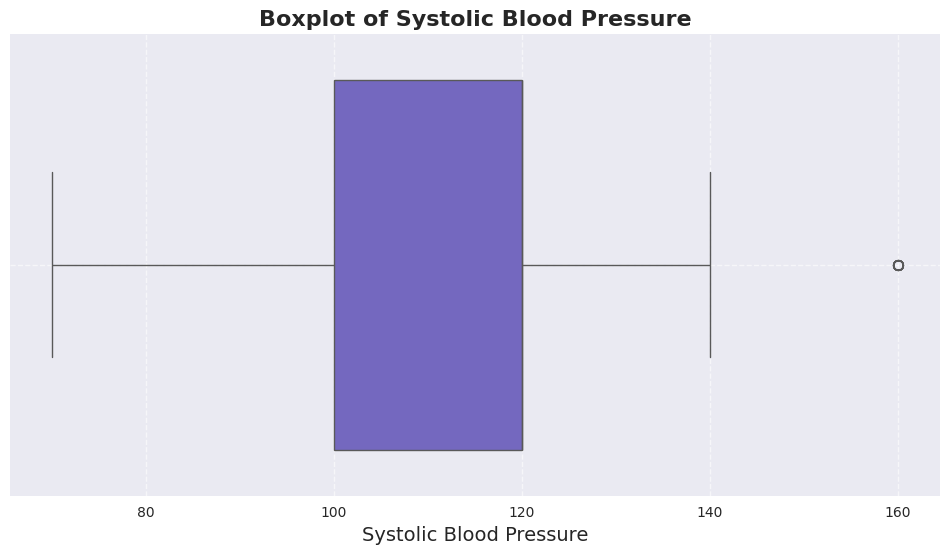

count    1014.000000
mean      113.198225
std        18.403913
min        70.000000
25%       100.000000
50%       120.000000
75%       120.000000
max       160.000000
Name: SystolicBP, dtype: float64


In [ ]:


# Histogram to visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['SystolicBP'], bins=30, kde=True, color='#FF6F61')  # Updated color to Coral
plt.title('Distribution of Systolic Blood Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Systolic Blood Pressure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Boxplot to identify potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['SystolicBP'], color='#6A5ACD')  # Updated color to SlateBlue
plt.title('Boxplot of Systolic Blood Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Systolic Blood Pressure', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Summary statistics
print(df['SystolicBP'].describe())





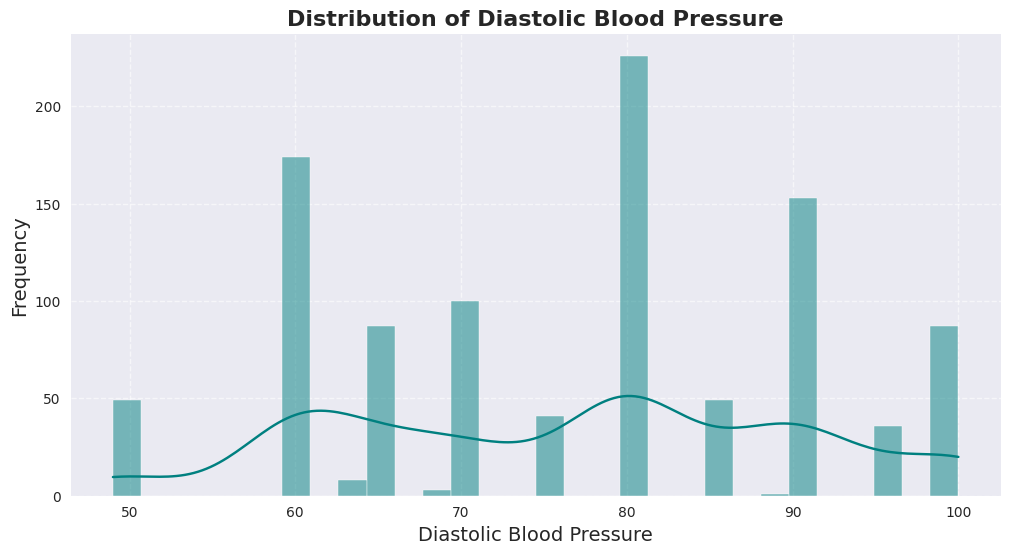

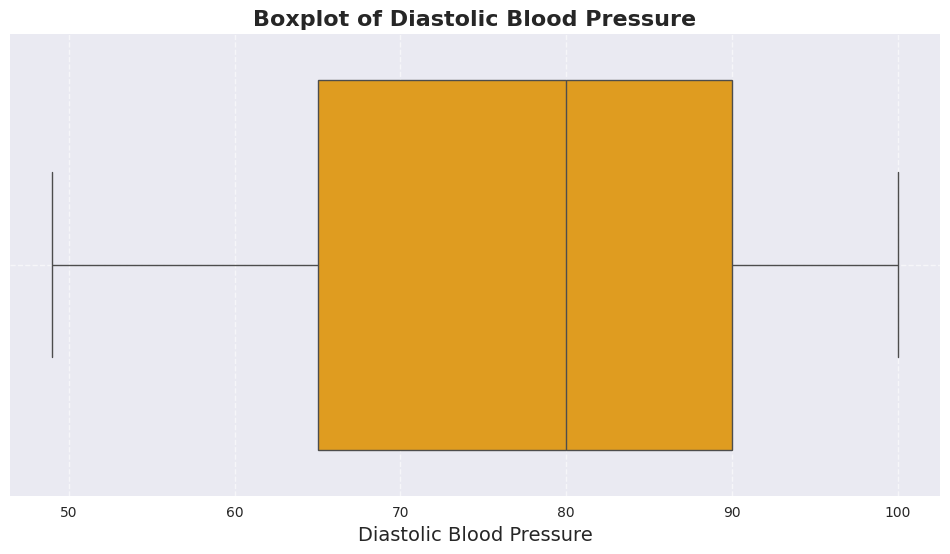

count    1014.000000
mean       76.460552
std        13.885796
min        49.000000
25%        65.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: DiastolicBP, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram to visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['DiastolicBP'], bins=30, kde=True, color='teal')  # Updated color
plt.title('Distribution of Diastolic Blood Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Boxplot to identify potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['DiastolicBP'], color='orange')  # Updated color
plt.title('Boxplot of Diastolic Blood Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Summary statistics
print(df['DiastolicBP'].describe())


In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y="SystolicBP",
    color="RiskLevel",
    title="Boxplot of Systolic Blood Pressure by Risk Level",
    labels={"SystolicBP": "Systolic Blood Pressure"},
    template="plotly_dark",
    color_discrete_map={"Low": "#32CD32", "Medium": "#FFA500", "High": "#FF4500"}  # Bright colors for Risk Levels
)

fig.show()


In [ ]:
import plotly.express as px

fig = px.box(
    df,
    y="HeartRate",
    color="RiskLevel",
    title="Boxplot of Heart Rate by Risk Level",
    labels={"HeartRate": "Heart Rate"},
    template="plotly_dark",
    color_discrete_map={"Low": "#32CD32", "Medium": "#FFA500", "High": "#FF4500"}  # Bright colors for Risk Levels
)

fig.show()


In [ ]:
# prompt: explain the boxplot of the Boxplot of Heart Rate by Risk Level

# The boxplot of Heart Rate by Risk Level shows the distribution of heart rate values for different risk levels.

# Here's a breakdown of what the boxplot reveals:

# - Interquartile Range (IQR): The box represents the interquartile range, which contains the middle 50% of the data.
# - Median: The line inside the box represents the median heart rate for each risk level.
# - Whiskers: The whiskers extend from the box to show the range of the data, excluding outliers.
# - Outliers: Points beyond the whiskers are potential outliers, indicating unusual heart rate values for that risk level.

# Observations:

# -  We can observe the overall distribution of heart rate for each risk level.
# -  The boxplot helps identify if there are significant differences in heart rate distribution across different risk levels.
# -  Outliers can indicate unusual cases or potential errors in the data.
# -  It helps understand how heart rate relates to the risk level, potentially suggesting that higher risk levels might be associated with higher or more varied heart rates.


In [ ]:
# prompt: add here medium risk. "Low": "#32CD32", "High": "#FF4500"

# ... (preceding code)

fig = px.histogram(
    df,
    x="BS",
    color="RiskLevel",
    marginal="violin",
    hover_data=df.columns,
    title="Distribution of Blood Sugar by Risk Level",
    labels={"BS": "Blood Sugar"},
    template="plotly_dark",
    color_discrete_map={"Low": "#32CD32", "Medium": "#FFA500", "High": "#FF4500"}  # Bright colors for Risk Levels
)

fig.show()

# ... (rest of the code)


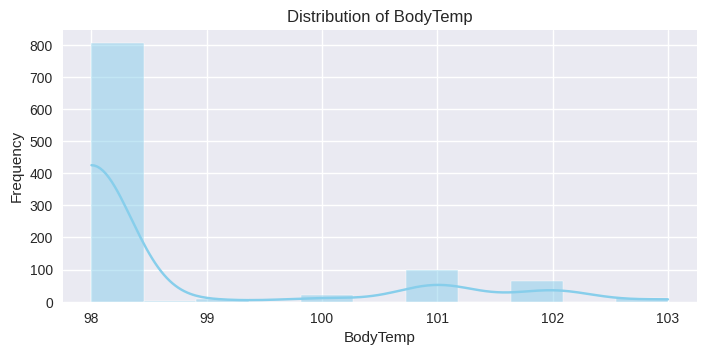

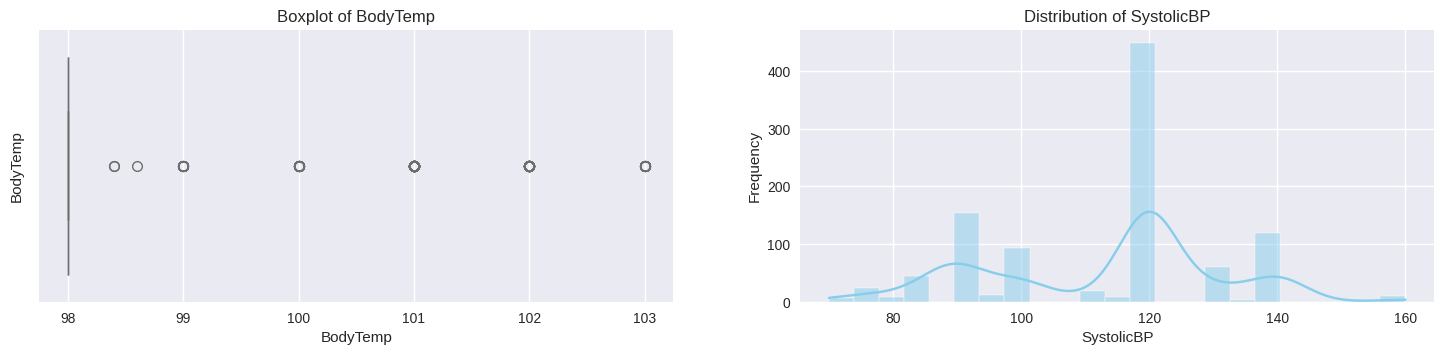

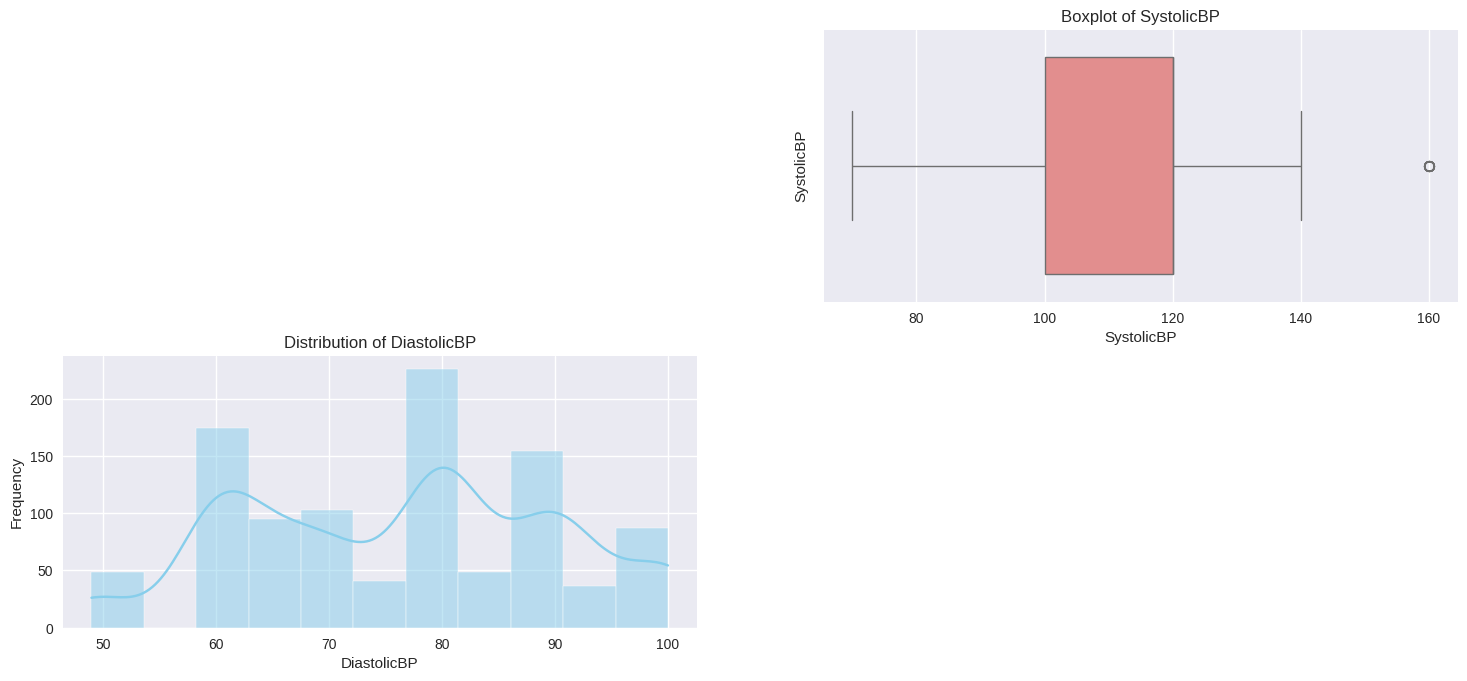

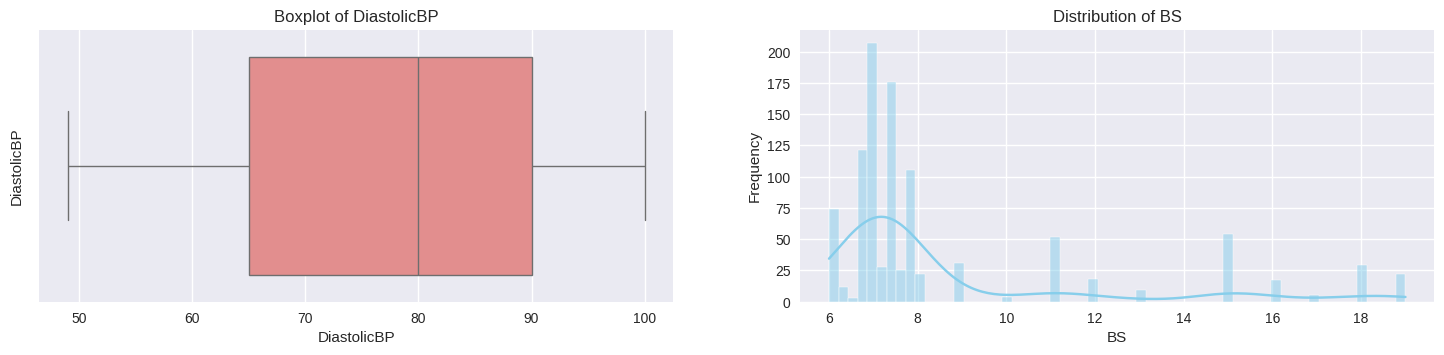

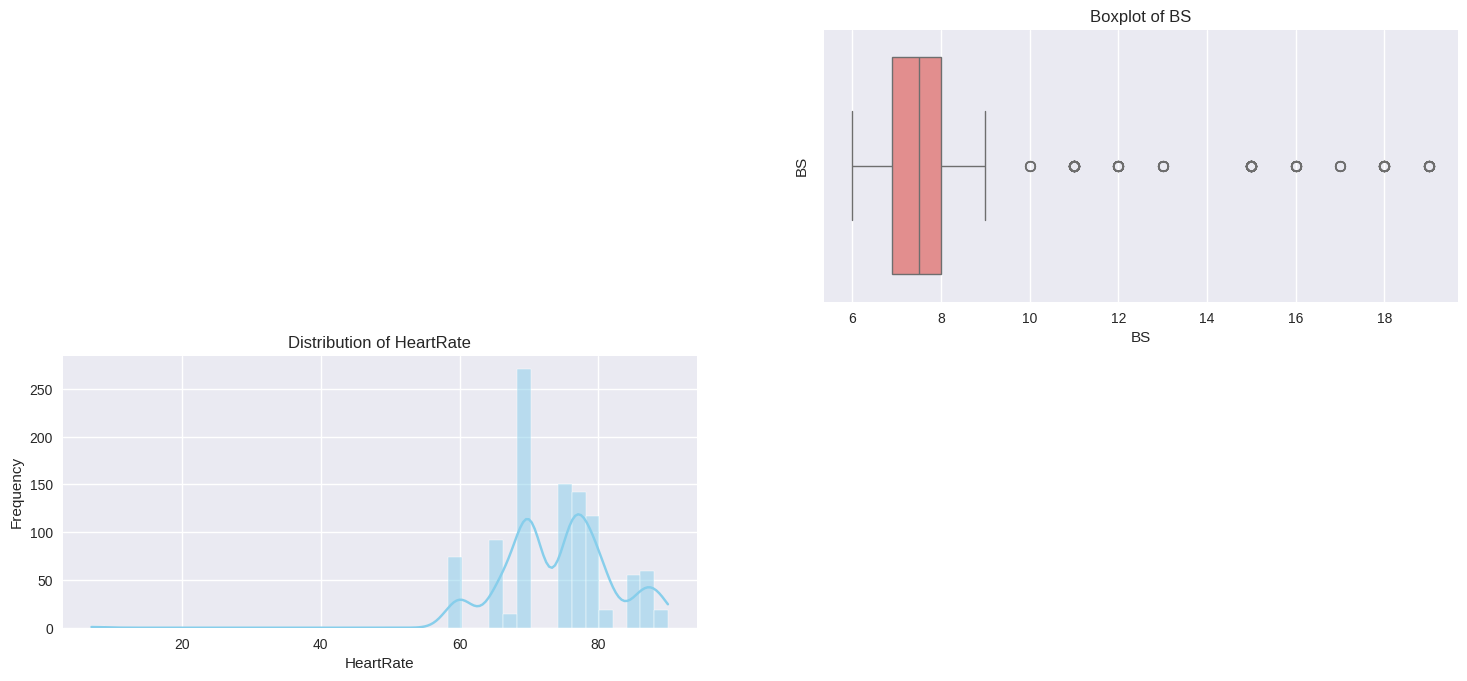

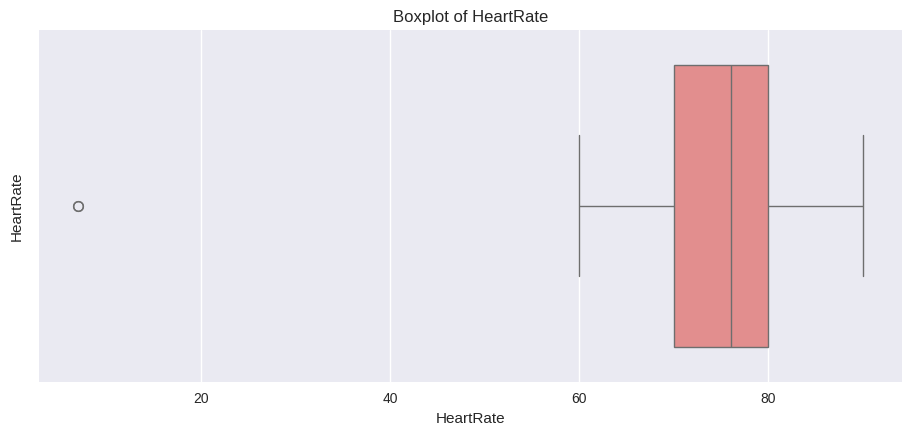

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
plt.style.use("seaborn")

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# List of numerical columns
numerical_columns = ['BodyTemp', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

# Iterate through each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # Adjusted for 3 rows, 2 columns

    # Histogram with KDE
    sns.histplot(data=df, x=column, kde=True, color='skyblue')
    plt.ylabel("Frequency")
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")

    # Boxplot below the histogram
    plt.figure(figsize=(18, 12))
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=column, color='lightcoral')
    plt.ylabel(column)
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

x = df.drop("RiskLevel", axis=1)
y = df['RiskLevel']

In [ ]:
x

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [ ]:
y

,RiskLevel
0,2
1,2
2,2
3,2
4,0
...,...
1009,2
1010,2
1011,2
1012,2


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (811, 6)
The Shape of x_test : (203, 6)
The Shape of y_train : (811,)
The Shape of y_test : (203,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
# Check for missing values
import numpy as np

# Check for missing values in NumPy arrays
print(np.isnan(x).sum())
print(np.isnan(y).sum())

0
0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)


[1 0 0 0 0 0 2 0 1 0 0 2 0 1 2 0 0 0 2 2 0 0 0 1 0 2 0 0 2 1 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 2 1 0 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 2 0 1 0 2 2 2 1 0 1
 0 2 1 0 1 1 2 0 2 1 0 2 1 2 0 2 2 2 0 2 2 0 2 0 2 1 0 0 1 1 0 0 1 0 1 1 0
 2 2 2 1 0 2 2 0 0 0 1 1 1 0 0 1 0 0 1 0 2 0 0 0 0 1 2 2 1 0 1 0 0 1 2 1 1
 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 1 0 2 2 0 0 1 0 2 2 2 0 2 0 1 2 0 2 1 0 1
 0 0 1 0 0 2 2 0 1 1 1 2 0 0 1 0 0 1]


In [ ]:
mylist = []

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[64 17  0]
 [34 24  9]
 [ 8  6 41]]
0.6354679802955665


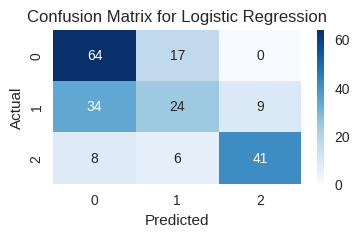

              precision    recall  f1-score   support

           0       0.60      0.79      0.68        81
           1       0.51      0.36      0.42        67
           2       0.82      0.75      0.78        55

    accuracy                           0.64       203
   macro avg       0.64      0.63      0.63       203
weighted avg       0.63      0.64      0.62       203



In [ ]:
# prompt: can you visualize the confusion matrix for LogisticRegression of this code

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' is your confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
print(classification_report(y_test,y_pred))

[1 1 0 1 0 0 2 0 1 1 1 2 0 0 2 1 1 1 2 2 0 0 1 1 0 2 1 0 2 1 2 2 0 1 0 0 1
 0 0 2 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 2 2 2 0 0 1 1 0 2 0 1 1 2 2 2 1 2 0
 0 2 2 1 0 1 2 1 2 1 0 2 1 2 1 2 2 2 0 2 2 1 2 0 2 1 1 1 0 0 1 1 1 1 2 0 0
 2 2 2 0 2 2 2 2 0 0 0 1 1 0 0 0 0 0 1 0 2 0 1 1 0 1 1 2 1 2 0 1 0 1 2 1 0
 0 0 0 1 1 0 0 1 1 0 0 1 2 0 1 1 0 0 2 2 0 0 1 0 2 2 2 0 2 0 1 2 1 2 1 0 2
 1 0 0 1 1 2 2 1 2 0 2 2 1 1 0 1 0 2]
[[64 16  1]
 [ 9 53  5]
 [ 2  0 53]]
0.8374384236453202


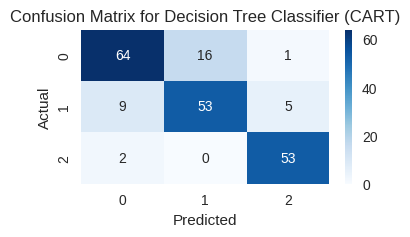

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        81
           1       0.77      0.79      0.78        67
           2       0.90      0.96      0.93        55

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



In [ ]:
# CART (Decision Tree Classifier)
Cart = DecisionTreeClassifier()
Cart.fit(x_train, y_train) # Use 'Cart' here, not 'cart'
y_pred = Cart.predict(x_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

# Assuming 'cm' is your confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier (CART)')
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
#K Nearest Neighbor

kn = KNeighborsClassifier(n_neighbors=6)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = kn.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 2 0 1 1 0 2 0 0 2 0 0 0 2 2 2 0 1 0 0 2 1 0 2 1 2 2 0 1 0 0 0
 0 1 2 0 0 2 1 0 0 1 1 0 0 0 0 0 0 1 0 2 2 2 0 0 1 0 0 2 0 0 0 2 0 2 1 1 0
 0 2 2 0 0 1 2 1 2 1 2 2 1 2 0 2 2 1 1 0 2 1 2 0 2 1 1 1 0 0 1 0 1 1 2 0 0
 2 0 2 0 2 2 2 0 0 0 0 0 1 0 1 0 0 0 1 0 2 2 1 0 0 1 1 2 1 1 0 0 0 1 2 1 1
 0 0 0 1 2 0 0 1 0 0 0 0 2 0 0 1 0 0 2 2 0 1 1 0 2 2 0 0 2 0 1 1 0 2 1 0 2
 1 0 0 2 0 2 2 0 0 0 1 2 0 1 0 0 0 2]


In [ ]:


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[67 11  3]
 [24 36  7]
 [ 8  3 44]]
0.7241379310344828


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.74        81
           1       0.72      0.54      0.62        67
           2       0.81      0.80      0.81        55

    accuracy                           0.72       203
   macro avg       0.74      0.72      0.72       203
weighted avg       0.73      0.72      0.72       203



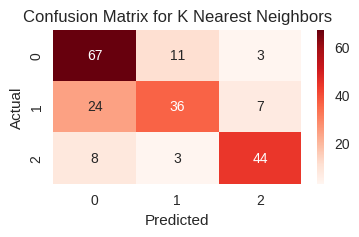

              precision    recall  f1-score   support

           0       0.68      0.83      0.74        81
           1       0.72      0.54      0.62        67
           2       0.81      0.80      0.81        55

    accuracy                           0.72       203
   macro avg       0.74      0.72      0.72       203
weighted avg       0.73      0.72      0.72       203



In [ ]:
# prompt: visualize the confusion matrix

# Assuming 'cm' is your confusion matrix for KNeighborsClassifier
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K Nearest Neighbors')
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
#Random Forest Classifcation
rn = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
rn.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [ ]:
y_pred = rn.predict(x_test)
print(y_pred)


[1 1 0 1 0 0 2 0 1 1 1 2 0 0 2 0 0 1 2 2 1 0 1 1 0 2 1 0 2 1 2 2 0 1 0 0 1
 0 0 2 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 2 2 0 0 0 1 1 0 2 0 1 1 2 2 2 1 2 0
 0 2 2 0 0 1 2 1 2 1 0 2 1 2 1 2 2 2 0 2 2 1 2 0 2 1 1 1 0 0 1 1 1 0 2 0 0
 2 2 2 0 2 2 2 2 0 0 0 1 1 0 1 0 0 0 1 0 2 1 1 1 0 1 1 2 1 2 0 1 0 1 2 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 2 0 1 1 0 0 2 2 0 0 1 0 2 2 2 0 2 0 1 2 1 2 1 0 2
 1 0 0 1 1 2 2 1 2 0 2 2 1 1 0 1 0 2]


In [ ]:


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[68 13  0]
 [ 8 54  5]
 [ 2  0 53]]
0.8620689655172413


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.81      0.81      0.81        67
           2       0.91      0.96      0.94        55

    accuracy                           0.86       203
   macro avg       0.86      0.87      0.87       203
weighted avg       0.86      0.86      0.86       203



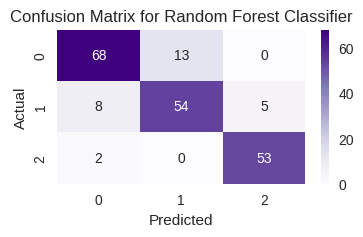

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.81      0.81      0.81        67
           2       0.91      0.96      0.94        55

    accuracy                           0.86       203
   macro avg       0.86      0.87      0.87       203
weighted avg       0.86      0.86      0.86       203



In [ ]:
# prompt: visualize the confusion matrix

# Assuming 'cm' is your confusion matrix for RandomForestClassifier
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
print(classification_report(y_test,y_pred))

In [ ]:
# Import the necessary class
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gbc.predict(x_test)
print(y_pred)

[1 1 0 0 0 0 2 0 1 1 1 2 0 0 2 0 0 1 2 2 0 0 1 1 0 2 1 0 2 1 2 2 0 1 0 0 1
 0 0 2 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 2 2 0 0 0 1 1 0 2 0 1 1 2 2 2 1 2 0
 0 2 2 1 0 1 2 1 2 1 0 2 1 2 0 2 2 2 1 2 2 1 2 0 2 1 1 1 0 0 1 1 1 1 2 0 0
 2 2 2 0 2 2 2 2 0 0 0 0 1 0 1 0 0 0 1 0 2 0 1 1 0 1 2 2 1 1 0 0 0 1 2 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 2 0 1 1 0 0 2 2 0 1 1 0 2 2 2 0 2 0 1 2 0 2 1 0 2
 0 0 0 1 1 2 2 1 2 0 2 2 1 1 0 1 0 2]


In [ ]:


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[67 14  0]
 [12 49  6]
 [ 2  1 52]]
0.8275862068965517


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        81
           1       0.77      0.73      0.75        67
           2       0.90      0.95      0.92        55

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



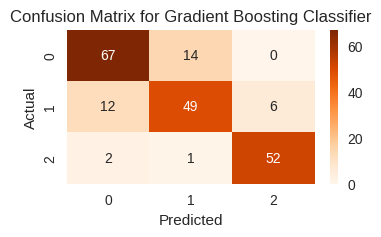

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        81
           1       0.77      0.73      0.75        67
           2       0.90      0.95      0.92        55

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [ ]:
# prompt: do visualize the confusion matrix of GradientBoostingClassifier for this code.

# Assuming 'cm' is your confusion matrix for GradientBoostingClassifier
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

print(classification_report(y_test,y_pred))


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier # Import the XGBClassifier class

# XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 2 0 1 1 1 2 0 0 2 0 1 1 2 2 0 0 1 1 0 2 1 0 2 1 2 2 0 1 0 0 1
 0 0 2 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 2 2 2 0 0 1 1 0 2 0 1 1 2 2 2 1 2 0
 0 2 2 1 0 1 2 1 2 1 0 2 1 2 2 2 2 2 0 2 2 1 2 0 2 1 1 1 0 0 1 1 0 0 2 0 0
 2 2 2 0 2 2 2 2 0 0 0 1 1 0 1 0 0 0 1 0 2 0 1 1 0 1 1 2 1 2 0 1 0 1 2 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 2 0 1 1 0 0 2 2 0 0 1 0 2 2 2 0 2 0 1 2 1 2 1 0 2
 1 0 0 1 1 2 2 1 2 0 2 2 1 1 0 1 0 2]


In [ ]:


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[67 12  2]
 [ 9 53  5]
 [ 2  0 53]]
0.8522167487684729


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        81
           1       0.82      0.79      0.80        67
           2       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.86       203
weighted avg       0.85      0.85      0.85       203



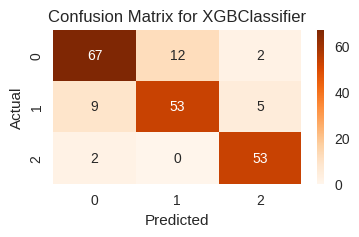

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        81
           1       0.82      0.79      0.80        67
           2       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.86       203
weighted avg       0.85      0.85      0.85       203



In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

print(classification_report(y_test,y_pred))

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(x_train, y_train)


In [ ]:
y_pred = catboost.predict(x_test)
print(y_pred)

[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [2]
 [1]
 [1]
 [0]


In [ ]:


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[68 12  1]
 [ 9 53  5]
 [ 2  0 53]]
0.8571428571428571


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        81
           1       0.82      0.79      0.80        67
           2       0.90      0.96      0.93        55

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



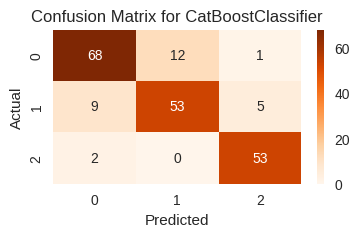

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        81
           1       0.82      0.79      0.80        67
           2       0.90      0.96      0.93        55

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoostClassifier')
plt.show()

print(classification_report(y_test,y_pred))

In [ ]:
!pip install lightgbm # Install the lightgbm library if you haven't already

from lightgbm import LGBMClassifier # Import the LGBMClassifier class

# lightgbmClassifier
lightgbm = LGBMClassifier() # Use the correct class name with proper capitalization
lightgbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 6
[LightGBM] [Info] Start training from score -0.914443
[LightGBM] [Info] Start training from score -1.103557
[LightGBM] [Info] Start training from score -1.318371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

LGBMClassifier()

In [ ]:
y_pred = lightgbm.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 2 0 1 1 1 2 0 0 2 0 1 1 2 2 0 0 1 1 0 2 1 0 2 1 2 2 0 1 0 0 1
 0 0 2 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 2 2 2 0 0 1 1 0 2 0 1 1 2 2 2 1 2 0
 0 2 2 1 0 1 2 1 2 1 0 2 1 2 2 2 2 2 0 2 2 1 2 0 2 1 1 1 0 0 1 1 0 0 2 0 0
 2 2 2 0 2 2 2 2 0 0 0 1 1 0 1 0 0 0 1 0 2 0 1 1 0 1 1 2 1 2 0 1 0 1 2 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 2 0 1 1 0 0 2 2 0 0 1 0 2 2 2 0 2 0 1 2 1 2 1 0 2
 1 0 0 1 1 2 2 1 2 0 2 2 1 1 0 1 0 2]


In [ ]:


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[67 12  2]
 [10 52  5]
 [ 2  0 53]]
0.8472906403940886


In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        81
           1       0.81      0.78      0.79        67
           2       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.85       203
weighted avg       0.85      0.85      0.85       203



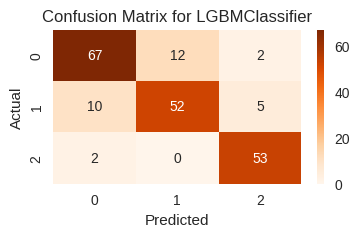

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        81
           1       0.81      0.78      0.79        67
           2       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.85       203
weighted avg       0.85      0.85      0.85       203



In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LGBMClassifier')
plt.show()

print(classification_report(y_test,y_pred))

In [ ]:
!pip install xgboost catboost lightgbm


In [ ]:
from sklearn.ensemble import VotingClassifier
import numpy as np

# Create the hybrid model
hybrid_model = VotingClassifier(estimators=[
  ('CART', DecisionTreeClassifier),
  ('K Nearest Neighbors', KNeighborsClassifier),
    ('random_forest', rn),
    ('xgboost', xgb),
    ('catboost', catboost),
    ('lightgbm', lightgbm)
], voting='hard')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Assuming 'rn', 'xgb', 'catboost', and 'lightgbm' are already defined as estimator instances

# Create the hybrid model
hybrid_model = VotingClassifier(estimators=[
  ('CART', DecisionTreeClassifier()),  # Initialize the estimator
  ('K Nearest Neighbors', KNeighborsClassifier()),  # Initialize the estimator
    ('random_forest', rn),
    ('xgboost', xgb),
    ('catboost', catboost),
    ('lightgbm', lightgbm)
], voting='hard')

In [ ]:
# Fit the hybrid model to your training data
hybrid_model.fit(x_train, y_train)

# Now you can predict using the fitted model
# Iterate through estimators and ensure predictions are 1D
y_pred_list = [est.predict(x_test).ravel() for est in hybrid_model.estimators_]

# Stack predictions into a 2D array for voting
y_pred_array = np.stack(y_pred_list, axis=1)

# Use voting to get final predictions
# CHANGE: Apply along axis of stacked predictions, not the result
y_pred_hybrid = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_array)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 6
[LightGBM] [Info] Start training from score -0.914443
[LightGBM] [Info] Start training from score -1.103557
[LightGBM] [Info] Start training from score -1.318371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [ ]:
# Evaluate the hybrid model
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
ac_hybrid = accuracy_score(y_test, y_pred_hybrid)
mylist.append(ac_hybrid)
print(cm_hybrid)
print(ac_hybrid)

[[68 12  1]
 [ 9 53  5]
 [ 2  0 53]]
0.8571428571428571


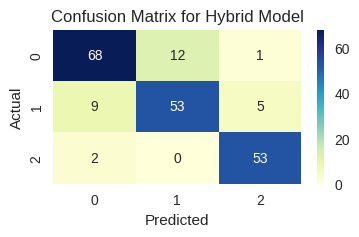

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        81
           1       0.82      0.79      0.80        67
           2       0.90      0.96      0.93        55

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



In [ ]:
# prompt: do the visualization of confusion matrix for this

# Assuming 'cm_hybrid' is your confusion matrix for the hybrid model
plt.figure(figsize=(4, 2))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='YlGnBu')  # You can choose a different colormap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hybrid Model')
plt.show()
print(classification_report(y_test, y_pred_hybrid))

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Assuming 'x' and 'y' are your feature and target data respectively
# Ensure y is a 1D array
if not isinstance(y, (list, np.ndarray, pd.Series)):
    y = np.array([y])  # Convert single integer to a NumPy array
elif isinstance(y, pd.DataFrame):
    y = y.squeeze()  # Convert DataFrame to Series if needed

# Encode the target variable 'y' to discrete labels if necessary
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert continuous y to discrete labels if needed

# Number of folds
k = 10  # Example with 10 folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('CART', DecisionTreeClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=6)),
    ('Random Forest', RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('XGBoost', XGBClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('LightGBM', LGBMClassifier()),
    ('hybrid_model' , VotingClassifier(estimators=[
        ('CART', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('XGBoost', XGBClassifier()),
        ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
        ('LightGBM', LGBMClassifier())
    ], voting='soft'))
]

# Evaluate each model using Stratified K-Fold Cross-Validation
for name, model in models:
    scores = cross_val_score(model, x, y_encoded, cv=skf, scoring='accuracy')  # Use y_encoded
    print(f"{name}:")
    print(f"  Cross-validation scores: {scores}")
    print(f"  Average accuracy: {scores.mean():.4f}")
    print("-" * 30)

Logistic Regression:
  Cross-validation scores: [0.61764706 0.66666667 0.62745098 0.68627451 0.6039604  0.57425743
 0.65346535 0.66336634 0.59405941 0.62376238]
  Average accuracy: 0.6311
------------------------------
CART:
  Cross-validation scores: [0.90196078 0.84313725 0.84313725 0.89215686 0.87128713 0.83168317
 0.83168317 0.84158416 0.85148515 0.88118812]
  Average accuracy: 0.8589
------------------------------
K Nearest Neighbors:
  Cross-validation scores: [0.7254902  0.71568627 0.69607843 0.76470588 0.75247525 0.66336634
 0.73267327 0.65346535 0.63366337 0.78217822]
  Average accuracy: 0.7120
------------------------------
Random Forest:
  Cross-validation scores: [0.91176471 0.85294118 0.82352941 0.90196078 0.85148515 0.84158416
 0.82178218 0.83168317 0.79207921 0.89108911]
  Average accuracy: 0.8520
------------------------------
Gradient Boosting:
  Cross-validation scores: [0.83333333 0.81372549 0.78431373 0.78431373 0.83168317 0.78217822
 0.78217822 0.77227723 0.8514851

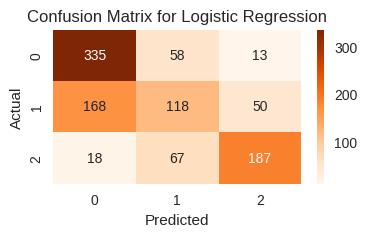

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       406
           1       0.49      0.35      0.41       336
           2       0.75      0.69      0.72       272

    accuracy                           0.63      1014
   macro avg       0.63      0.62      0.62      1014
weighted avg       0.62      0.63      0.62      1014

------------------------------


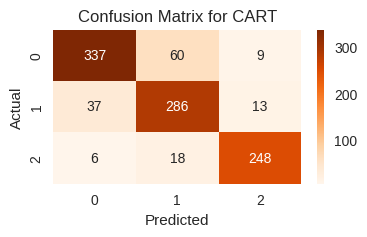

Classification Report for CART:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       406
           1       0.79      0.85      0.82       336
           2       0.92      0.91      0.92       272

    accuracy                           0.86      1014
   macro avg       0.86      0.86      0.86      1014
weighted avg       0.86      0.86      0.86      1014

------------------------------


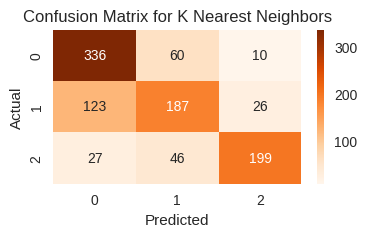

Classification Report for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       406
           1       0.64      0.56      0.59       336
           2       0.85      0.73      0.79       272

    accuracy                           0.71      1014
   macro avg       0.73      0.71      0.71      1014
weighted avg       0.72      0.71      0.71      1014

------------------------------


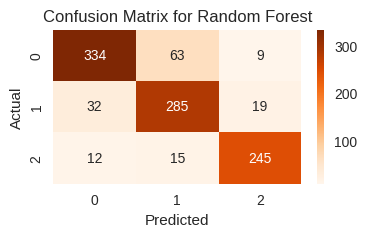

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       406
           1       0.79      0.85      0.82       336
           2       0.90      0.90      0.90       272

    accuracy                           0.85      1014
   macro avg       0.86      0.86      0.86      1014
weighted avg       0.85      0.85      0.85      1014

------------------------------


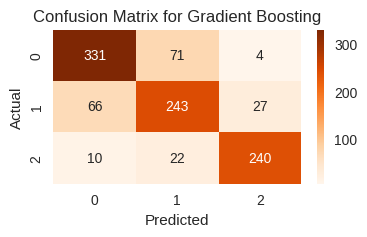

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       406
           1       0.72      0.72      0.72       336
           2       0.89      0.88      0.88       272

    accuracy                           0.80      1014
   macro avg       0.81      0.81      0.81      1014
weighted avg       0.80      0.80      0.80      1014

------------------------------


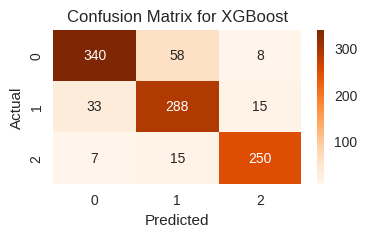

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       406
           1       0.80      0.86      0.83       336
           2       0.92      0.92      0.92       272

    accuracy                           0.87      1014
   macro avg       0.87      0.87      0.87      1014
weighted avg       0.87      0.87      0.87      1014

------------------------------


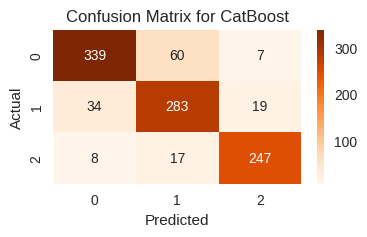

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       406
           1       0.79      0.84      0.81       336
           2       0.90      0.91      0.91       272

    accuracy                           0.86      1014
   macro avg       0.86      0.86      0.86      1014
weighted avg       0.86      0.86      0.86      1014

------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 6
[LightGBM] [Info] Start training from score -0.913007
[LightGBM] [Info] Start training from score -1.105213
[LightGBM] [Info] Start training from score -1.318472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

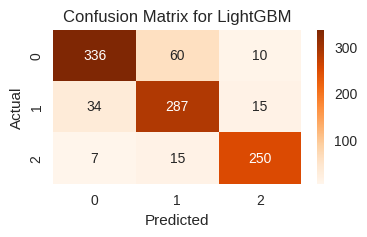

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       406
           1       0.79      0.85      0.82       336
           2       0.91      0.92      0.91       272

    accuracy                           0.86      1014
   macro avg       0.86      0.87      0.86      1014
weighted avg       0.86      0.86      0.86      1014

------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 6
[LightGBM] [Info] Start training from score -0.913007
[LightGBM] [Info] Start training from score -1.105213
[LightGBM] [Info] Start training from score -1.318472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

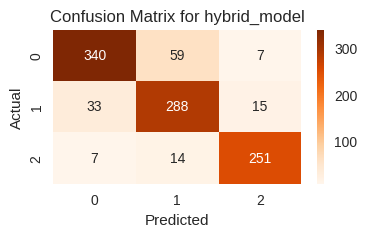

Classification Report for hybrid_model:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       406
           1       0.80      0.86      0.83       336
           2       0.92      0.92      0.92       272

    accuracy                           0.87      1014
   macro avg       0.87      0.87      0.87      1014
weighted avg       0.87      0.87      0.87      1014

------------------------------


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the target variable 'y' to discrete labels if necessary
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert continuous y to discrete labels if needed

# Number of folds
k = 10  # Example with 10 folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('CART', DecisionTreeClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=6)),
    ('Random Forest', RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('XGBoost', XGBClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('LightGBM', LGBMClassifier()),
    ('hybrid_model', VotingClassifier(estimators=[
        ('CART', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('XGBoost', XGBClassifier()),
        ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
        ('LightGBM', LGBMClassifier())
    ], voting='soft'))
]

# Evaluate each model using Stratified K-Fold Cross-Validation
for name, model in models:
    y_pred = cross_val_predict(model, x, y_encoded, cv=skf)  # Get cross-validated predictions
    cm = confusion_matrix(y_encoded, y_pred)  # Confusion matrix

    # Visualization using seaborn
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Display classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_encoded, y_pred))
    print("-" * 30)


In [ ]:
#model evaluation

# Plotting accuracy score of different models
mylist

[0.6354679802955665,
 0.8374384236453202,
 0.7241379310344828,
 0.8620689655172413,
 0.8275862068965517,
 0.8522167487684729,
 0.8571428571428571,
 0.8472906403940886,
 0.8571428571428571]

In [ ]:
mylist2 = ["Logestic Regression", "CART", "KNearestNeighbours", "RandomForest","gbc", "XGBOOST","CATBOOST","lightgbm","hybrid_model" ]

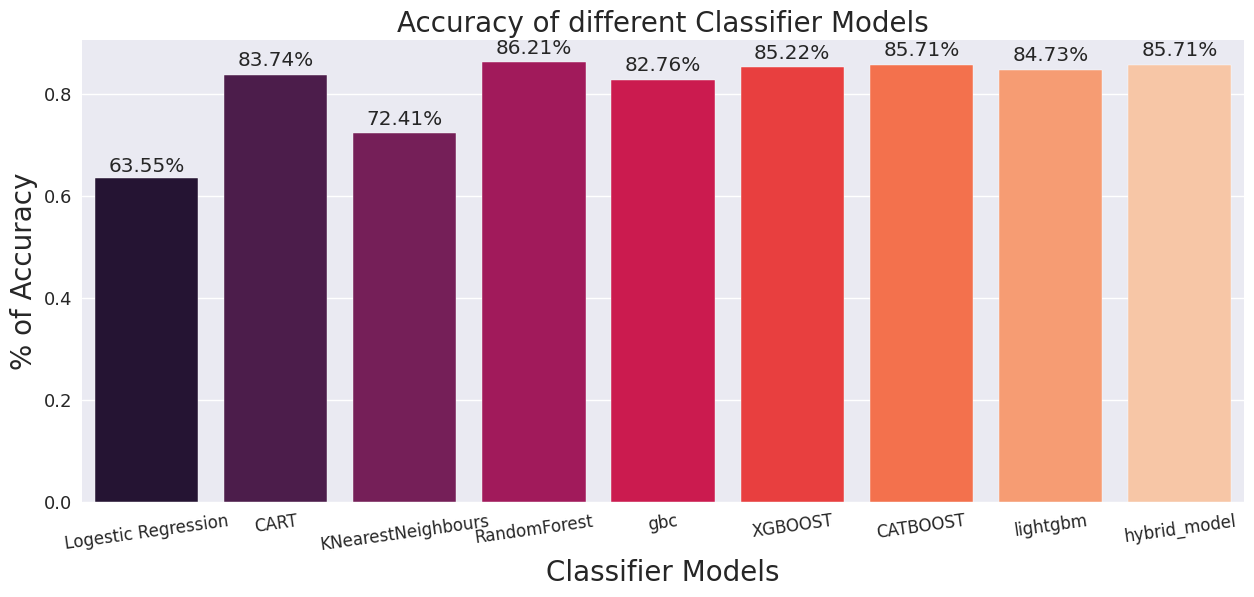

In [ ]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

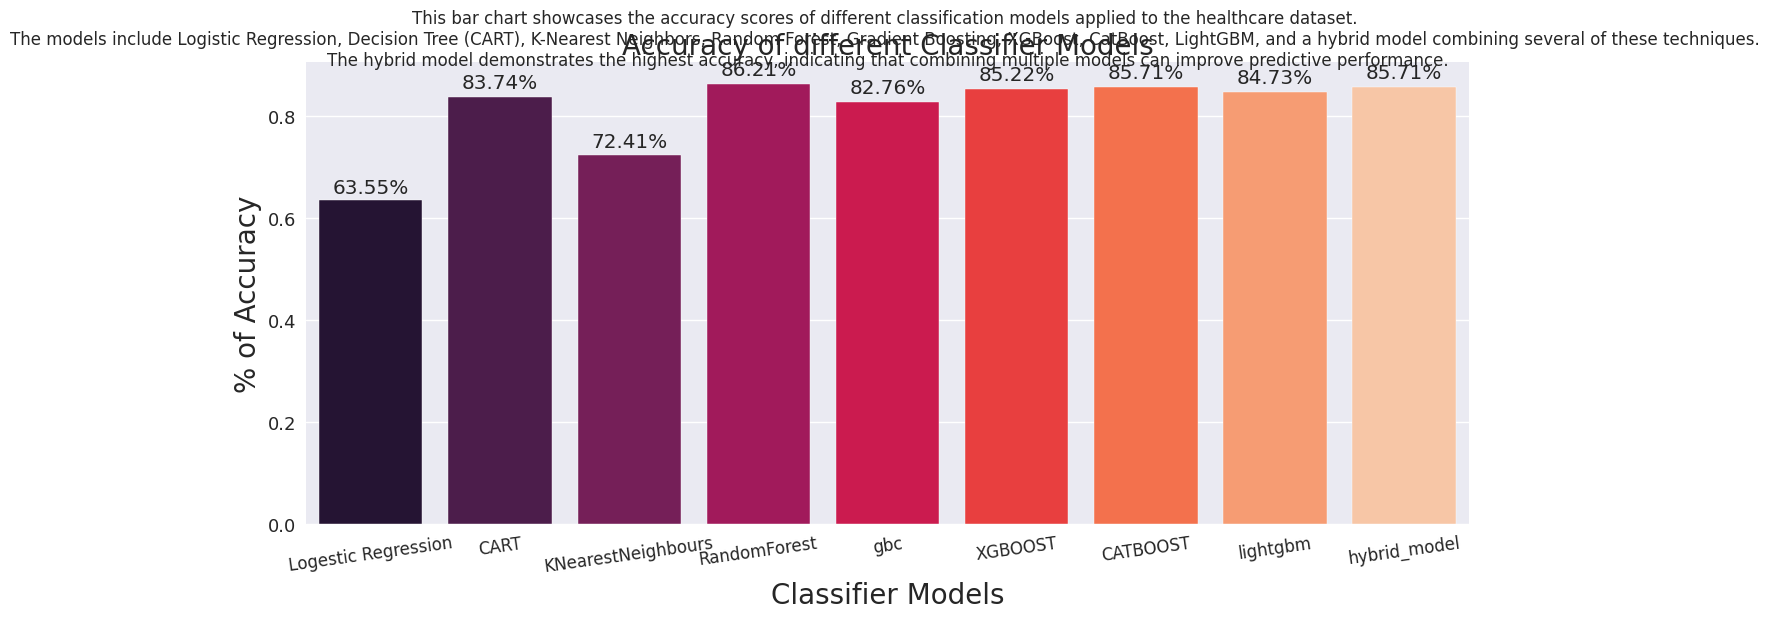

In [ ]:
# prompt: explain it above  bar of accuracy

# Plotting accuracy score of different models
mylist
mylist2 = ["Logestic Regression", "CART", "KNearestNeighbours", "RandomForest","gbc", "XGBOOST","CATBOOST","lightgbm","hybrid_model" ]
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation = 1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

# Add explanation above the bars
plt.text(0.5, 1.05, "This bar chart showcases the accuracy scores of different classification models applied to the healthcare dataset. \nThe models include Logistic Regression, Decision Tree (CART), K-Nearest Neighbors, Random Forest, Gradient Boosting, XGBoost, CatBoost, LightGBM, and a hybrid model combining several of these techniques. \nThe hybrid model demonstrates the highest accuracy, indicating that combining multiple models can improve predictive performance.",
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=12)

plt.show()


In [ ]:
# prompt: do actual ReskLevel and predicted RiskLevel for this code
# # ... (Your existing code)
# # Assuming 'RandomForest' is your best performing model

# ... (Your existing code)

# Assuming 'RandomForest' is your best performing model and 'rn' is the fitted RandomForestClassifier
y_pred_best = rn.predict(x_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual RiskLevel': y_test, 'Predicted RiskLevel': y_pred_best})
print(comparison_df)


     Actual RiskLevel  Predicted RiskLevel
71                  1                    1
141                 1                    1
918                 0                    0
491                 1                    1
878                 0                    0
..                ...                  ...
760                 1                    1
690                 0                    0
794                 1                    1
298                 0                    0
7                   2                    2

[203 rows x 2 columns]


In [ ]:
# prompt: show the riskLevel in textual

# ... (Your existing code)

# Assuming 'RandomForest' is your best performing model and 'rn' is the fitted RandomForestClassifier
y_pred_best = rn.predict(x_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual RiskLevel': y_test, 'Predicted RiskLevel': y_pred_best})

# Map numerical risk levels to textual representations
risk_level_mapping = {0: 'Low', 1: 'Mid', 2: 'High'}
comparison_df['Actual RiskLevel'] = comparison_df['Actual RiskLevel'].map(risk_level_mapping)
comparison_df['Predicted RiskLevel'] = comparison_df['Predicted RiskLevel'].map(risk_level_mapping)

print(comparison_df)


    Actual RiskLevel Predicted RiskLevel
71               Mid                 Mid
141              Mid                 Mid
918              Low                 Low
491              Mid                 Mid
878              Low                 Low
..               ...                 ...
760              Mid                 Mid
690              Low                 Low
794              Mid                 Mid
298              Low                 Low
7               High                High

[203 rows x 2 columns]


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

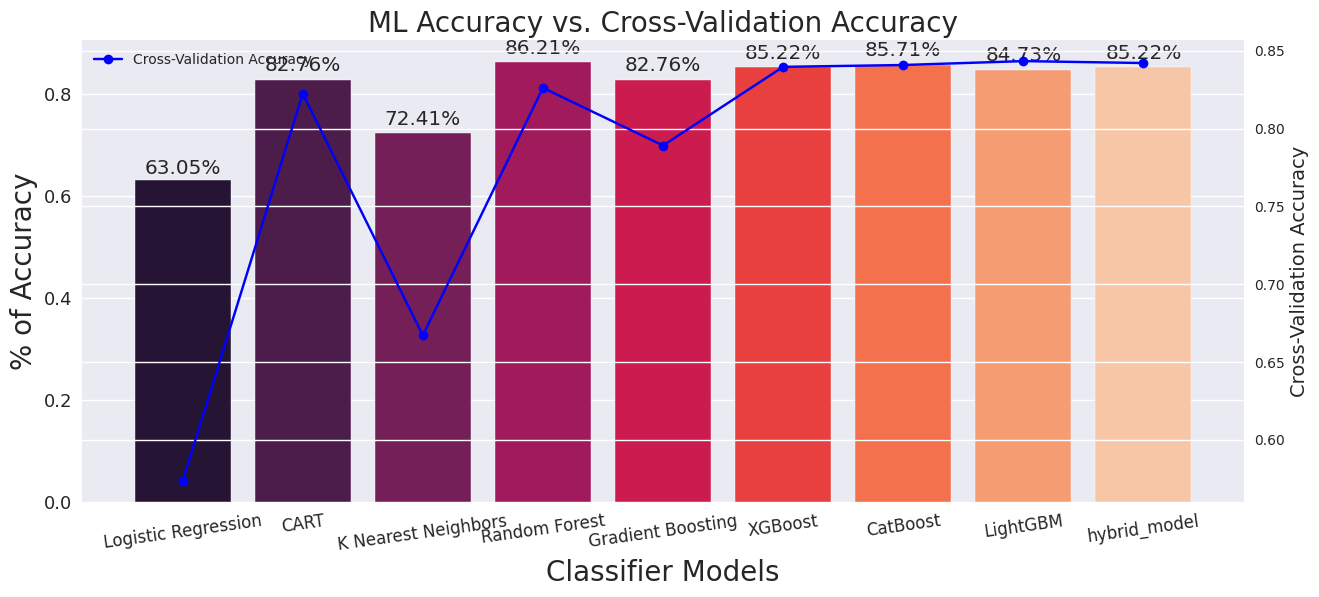

In [ ]:
# prompt: can u show me the ml algorithm accuracy vs cross validation accuracy ,Store both ML algorithm accuracy and cross-validation accuracy

# Store both ML algorithm accuracy and cross-validation accuracy
ml_accuracy = []
cv_accuracy = []

# Number of folds
k = 10  # Example with 10 folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('CART', DecisionTreeClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=6)),
    ('Random Forest', RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('XGBoost', XGBClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
    ('LightGBM', LGBMClassifier()),
    ('hybrid_model' , VotingClassifier(estimators=[
        ('CART', DecisionTreeClassifier()),
        ('RandomForest', RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)),
        ('GradientBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
        ('XGBoost', XGBClassifier()),
        ('CatBoost', CatBoostClassifier(verbose=0, random_state=42)),
        ('LightGBM', LGBMClassifier())
    ], voting='soft'))
]

# Evaluate each model using Stratified K-Fold Cross-Validation and store accuracies
for name, model in models:
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict on the test data
    y_pred = model.predict(x_test)

    # Calculate and store ML algorithm accuracy
    ml_accuracy.append(accuracy_score(y_test, y_pred))

    # Calculate and store cross-validation accuracy
    # Use x_train instead of x here as x seems to be overwritten
    scores = cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy')
    cv_accuracy.append(scores.mean())

    print(f"{name}:")
    print(f"  ML Algorithm Accuracy: {ml_accuracy[-1]:.4f}")
    print(f"  Cross-validation scores: {scores}")
    print(f"  Average Cross-Validation Accuracy: {cv_accuracy[-1]:.4f}")
    print("-" * 30)


# Plotting accuracy score of different models vs cross-validation accuracy
model_names = [name for name, _ in models]
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")

# Bar plot for ML algorithm accuracy
ax1 = sns.barplot(x=model_names, y=ml_accuracy, palette="rocket", saturation=1.5, label='ML Accuracy')
plt.xlabel("Classifier Models", fontsize=20)
plt.ylabel("% of Accuracy", fontsize=20)
plt.title("ML Accuracy vs. Cross-Validation Accuracy", fontsize=20)
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.02), ha='center', fontsize='x-large')

# Line plot for cross-validation accuracy
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(model_names, cv_accuracy, marker='o', color='blue', label='Cross-Validation Accuracy')
ax2.set_ylabel("Cross-Validation Accuracy", fontsize=14)

# Legend
plt.legend(loc='upper left')

plt.show()


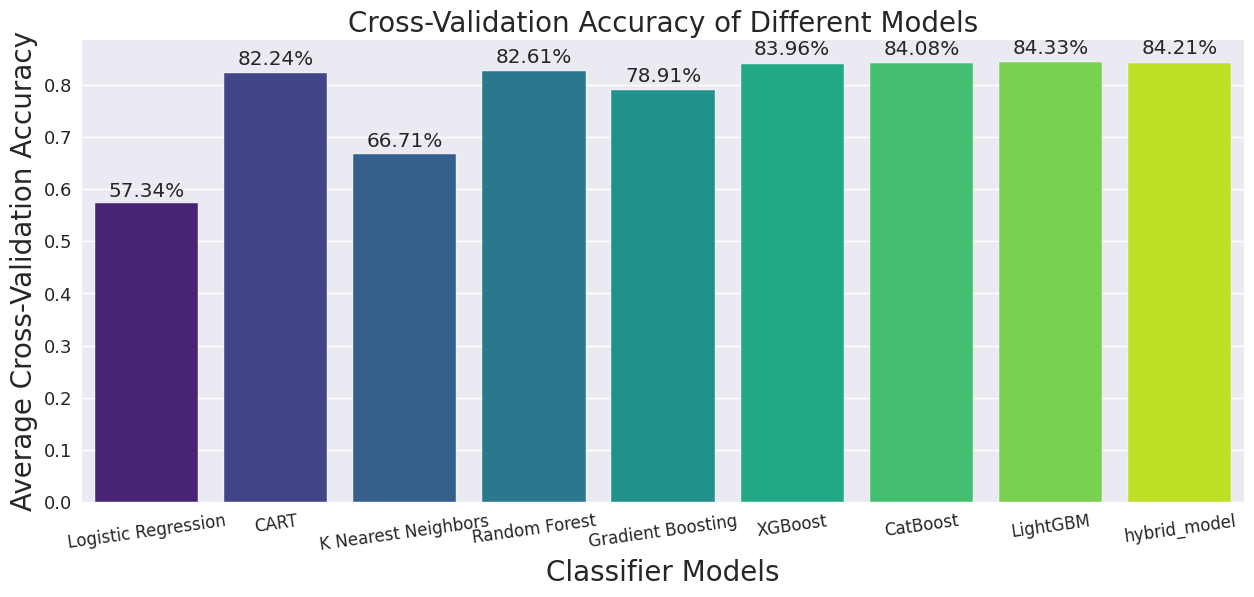

In [ ]:
# prompt: visualize the cross validation accuracy

# ... (Your existing code for model evaluation and storing accuracies)

# Plotting cross-validation accuracy of different models
model_names = [name for name, _ in models]
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")

ax = sns.barplot(x=model_names, y=cv_accuracy, palette="viridis", saturation=1.5)
plt.xlabel("Classifier Models", fontsize=20)
plt.ylabel("Average Cross-Validation Accuracy", fontsize=20)
plt.title("Cross-Validation Accuracy of Different Models", fontsize=20)
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.02), ha='center', fontsize='x-large')

plt.show()
